# Logistic Regression

🎯 Up until now, you have been modeling a regression task. This time, you are going to be modeling a classification task, on the famous Titanic dataset.

👇 Load the `titanic.csv` dataset into this notebook as a pandas dataframe, and display its first 5 rows.

In [1]:
import pandas as pd

df = pd.read_csv('https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_Titanic_dataset.csv')

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


```markdown
Variable    Definition      Key

survival    Survival        0 = No, 1 = Yes
pclass      Ticket class    1 = 1st, 2 = 2nd, 3 = 3rd
sex         Sex
Age         Age in years
sibsp       # of siblings / spouses aboard the Titanic
parch       # of parents / children aboard the Titanic
ticket      Ticket number
fare        Passenger fare
cabin       Cabin number
embarked    Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton
```

# 1. Model evaluation

👇 We want to predict whether a passenger survived (`Survived`) the Titanic disaster, according to the following features:

- The class in which she/he was travelling (`Pclass`)
- The number of siblings/spouses he had onboard (`SibSp`)
- The number of parents/children he had onboard (`Parch`)
- The fare he paid for the ticket (`Fare`)

❓How accurate would a [`LogisticRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) model be at such a task? Cross-validate the model and save the mean accuracy under variable name `accuracy`.

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score


features = ['Pclass', 'SibSp', 'Parch', 'Fare']
X = df[features]
y = df['Survived']

# Initialize the Logistic Regression model
logistic_model = LogisticRegression()

# Cross-validate the Logistic Regression model and calculate the mean accuracy
accuracy = cross_val_score(logistic_model, X, y, cv=5).mean()

### ☑️ Check your code

In [3]:
from nbresult import ChallengeResult

result = ChallengeResult('accuracy',
                         accuracy = accuracy
)
result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /Users/francoisgirard/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/francoisgirard/code/francoisgirard51/05-ML/01-Fundamentals-of-Machine-Learning/data-logistic-regression/tests
plugins: asyncio-0.19.0, typeguard-2.13.3, anyio-3.6.2
asyncio: mode=strict
collecting ... collected 1 item

test_accuracy.py::TestAccuracy::test_accuracy PASSED                     [100%]

============================== 1 passed in 0.20s ===============================


💯 You can commit your code:

git add tests/accuracy.pickle

git commit -m 'Completed accuracy step'

git push origin master



# 2. In-depth diagnosis

❓ We've evaluated the accuracy of the model at predicting, but we want to investigate its performance in more depth. Is the model overfitting? Underfitting? How many learning examples does it need to learn optimally on the given features?

<br/>

<details>
<summary> ℹ️ What do we want? </summary>   
    
<br/>
We want learning curves.
    
</details>


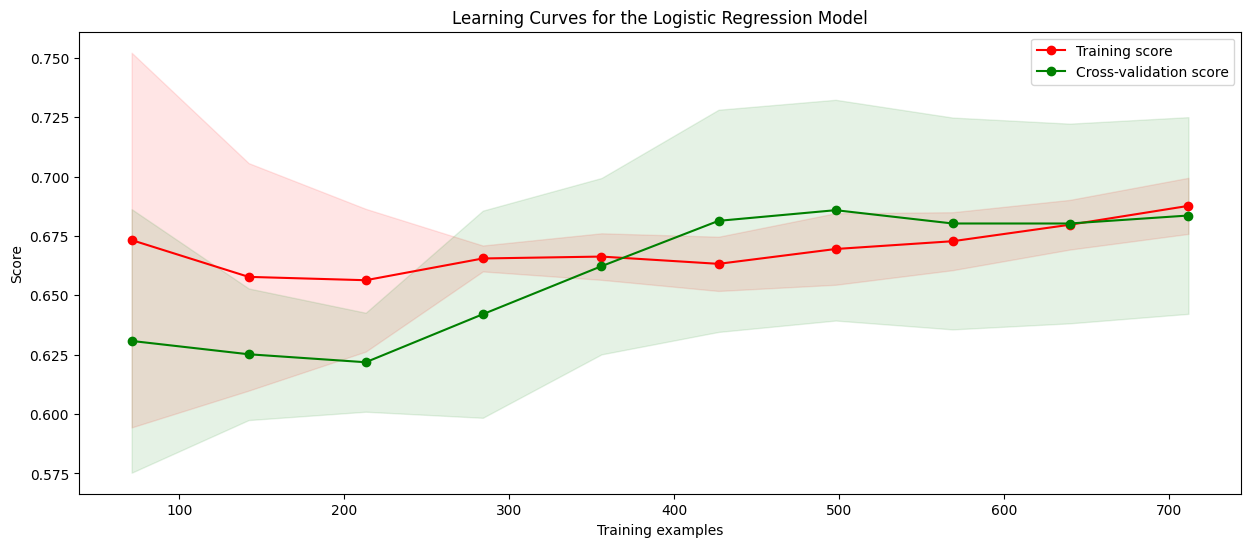

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve


# Calculating the learning curves
train_sizes, train_scores, validation_scores = learning_curve(
    estimator=logistic_model,
    X=X,
    y=y,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5
)

# Calculating mean and standard deviation for training and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
validation_scores_mean = np.mean(validation_scores, axis=1)
validation_scores_std = np.std(validation_scores, axis=1)

plt.figure(figsize=(15, 6))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, validation_scores_mean - validation_scores_std,
                 validation_scores_mean + validation_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, validation_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.title("Learning Curves for the Logistic Regression Model")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.legend(loc="best")
plt.show()


<details>
<summary> ℹ️ Once you have completed your diagnosis, unfold this cell for our interpretation </summary>   
    
<br/>
You should have plotted the <a href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.learning_curve.html">learning curves</a>.

👉 The curves should have converged:
- The model is not overfitting (no variance): it generalizes well.

👉 The test score stops increasing around 500 training observations:
- The model does not need more than 500 training observations to perform optimally on the given features.
    
</details>


# 3. Reduced training size

👇 Evaluate a model on the training size suggested by the curves. Are you able to maintain a similar accuracy? Save the new accuracy under variable name `reduced_training_accuracy`

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# Based on the learning curves, let's assume a reduced training size of 50% is suggested
reduced_training_size = 0.5

# Splitting the data with the reduced training size
X_train_reduced, _, y_train_reduced, _ = train_test_split(X, y, train_size=reduced_training_size, random_state=42)

# Training the Logistic Regression model on the reduced training set
model_reduced = LogisticRegression()
model_reduced.fit(X_train_reduced, y_train_reduced)

# Evaluating the model on the full dataset
reduced_training_accuracy = cross_val_score(model_reduced, X, y, cv=5).mean()

ℹ️ The accuracy should be nearly the same, with a reduced computational expense.

### ☑️ Check your code

In [12]:
from nbresult import ChallengeResult

result = ChallengeResult('reduced_accuracy',
                         accuracy = reduced_training_accuracy
)
result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /Users/francoisgirard/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/francoisgirard/code/francoisgirard51/05-ML/01-Fundamentals-of-Machine-Learning/data-logistic-regression/tests
plugins: asyncio-0.19.0, typeguard-2.13.3, anyio-3.6.2
asyncio: mode=strict
collecting ... collected 1 item

test_reduced_accuracy.py::TestReduced_accuracy::test_accuracy PASSED     [100%]

============================== 1 passed in 0.18s ===============================


💯 You can commit your code:

git add tests/reduced_accuracy.pickle

git commit -m 'Completed reduced_accuracy step'

git push origin master



# 4. Predictions

❓ Did the following person survive the Titanic disaster?

- Travelled in class 1 (`Pclass`)
- Had no spouse or siblings on board(`SibSp`)
- Had no parents or children on board (`Parch`)
- Paid 15 for his ticket (`Fare`)

Create and fit a new model (remember, `cross_validate` doesn't return a fitted model).

⚠️ Make sure the model you use for predicting has the **least computational expense possible**. Save the prediction under variable name `prediction`.

In [14]:
# Convert person_details to a DataFrame with the same feature names as X
person_details_df = pd.DataFrame(person_details, columns=['Pclass', 'SibSp', 'Parch', 'Fare'])

# Making a prediction for the given person using the DataFrame
prediction = model_for_prediction.predict(person_details_df)

❓ What is the probability that the person survived? Compute your answer and save it under variable name `probability`.

<br/>

<details>
    <summary markdown='span'>💡 Hint</summary>

To return the predicted probabilities from a fitted sklearn Classifier, have a look at the method `.predict_proba()`
</details>

In [21]:
# Computing the probability of survival for the given person
probability_array = model_for_prediction.predict_proba(person_details_df)

# Extracting the probability of survival (class 1) as a single float number
probability = probability_array[0, 1]

### ☑️ Check your code

In [22]:
from nbresult import ChallengeResult

result = ChallengeResult('predictions',
                         prediction = prediction,
                         probability = probability
)

result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /Users/francoisgirard/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/francoisgirard/code/francoisgirard51/05-ML/01-Fundamentals-of-Machine-Learning/data-logistic-regression/tests
plugins: asyncio-0.19.0, typeguard-2.13.3, anyio-3.6.2
asyncio: mode=strict
collecting ... collected 3 items

test_predictions.py::TestPredictions::test_prediction_is_1 PASSED        [ 33%]
test_predictions.py::TestPredictions::test_probability PASSED            [ 66%]
test_predictions.py::TestPredictions::test_probability_type PASSED       [100%]

============================== 3 passed in 0.30s ===============================


💯 You can commit your code:

git add tests/predictions.pickle

git commit -m 'Completed predictions step'

git push origin master



# 5 Optional - Model Calibration
*Can you trust the predicted probabilities?* 🤔

- ❗️ Accuracy only evaluate your model performance based on the predicted **classes** 0s and 1s (obtained via`.predict()`)
- ❗️ High accuracy does not necessarily mean that predicted **probabilities** are "calibrated" (obtained via `.predict_probas()`)

What does "calibrated" probabilities mean? 
> _Among the samples to which your model gave a predict_proba value close to 0.9, approximately 90% actually belong to the positive class._

<img src='https://wagon-public-datasets.s3.amazonaws.com/data-science-images/math/logistic-regression.png'>

❓ **Question 1**: Read more about [Calibration](https://scikit-learn.org/stable/modules/calibration.html) on sklearn docs

❓ **Question 2**: Try to implement [`CalibrationDisplay`](https://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibrationDisplay.html) to check if you model is calibrated (on a holdout test set)

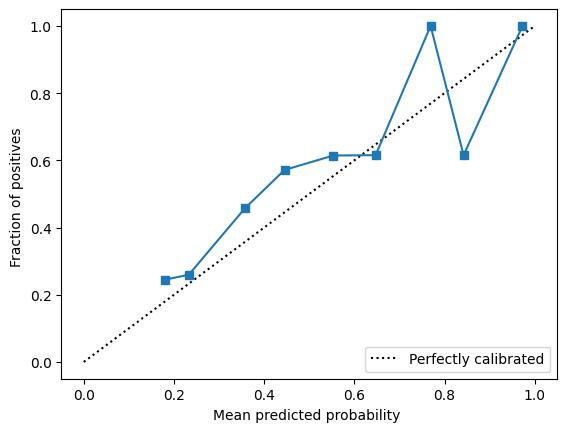

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.calibration import CalibrationDisplay
X_train, X_test, y_train, y_test = train_test_split(np.array(X), np.array(y), test_size=0.5, random_state=1)

# Fit a model on the train set
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Splitting the dataset into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(np.array(X), np.array(y), test_size=0.5, random_state=1)

# Fit a Logistic Regression model on the train set
model = LogisticRegression()
model.fit(X_train, y_train)

# Print calibration curve on the test set
from sklearn.calibration import calibration_curve, CalibrationDisplay
import matplotlib.pyplot as plt

# Getting predicted probabilities
y_probs = model.predict_proba(X_test)[:, 1]

# Generating calibration curve data
prob_true, prob_pred = calibration_curve(y_test, y_probs, n_bins=10)

# Plotting the calibration curve
CalibrationDisplay(prob_true, prob_pred, y_probs).plot()
plt.show()

<details>
    <summary markdown='span'>ℹ️ Interpreting the calibration curves</summary>

If for the previous prediction you got a probability of around 0.65 then, if the model was well-calibrated, 65% of the cases that model assigns a probability of 0.65 would _actually_ have the class 1 ("Survived" in our case).
    
But from our calibration curves we can notice, that when the model predicts 0.65, there's actually _less_ (below the curve) real fraction of cases with class 1.
</details>

❓ **Question 3**: Try to calibrate your model using sklearn's [`CalibratedClassifierCV`](https://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html), and compute your new probability of survival. 

> Note that logistic regression models are already generally well calibrated because they try to minimize the log-loss. Refer to lecture https://kitt.lewagon.com/camps/👉YOUR_CAMP_NUMBER👈/lectures/content/04-Decision-Science_04-Logistic-Regression.slides.html?title=Logistic-Regression#/2/7/0

In [24]:
from sklearn.calibration import CalibratedClassifierCV

# Create and fit a new Logistic Regression model on the training data
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Calibrate the model using CalibratedClassifierCV
calibrated_model = CalibratedClassifierCV(logistic_model, method='sigmoid', cv='prefit')
calibrated_model.fit(X_train, y_train)

# Compute the new probability of survival for the given person
calibrated_probability = calibrated_model.predict_proba(person_details_df)[0, 1]

/Users/francoisgirard/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


<details>
    <summary markdown='span'>ℹ️ Interpreting the new probability</summary>

Our previous model tended to slightly _overestimate_ probabilities around the middle range (for example, there were actually less than 65% of class 1 cases when model was predicting probability of 0.65).
    
Calibration seems to have made our model slightly _underestimate_ those probabilities 🙃; for example, when the model predicts a probability of 0.5 the real fraction of cases with class 1 is more than that.
</details>

# 🏁